<a href="https://colab.research.google.com/github/cantaruttim/Projeto_Integrador_III/blob/main/Proj_Int_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Professor**: *Jobel*

# **Alunos**: *Fernando Cardoso, Kayo Kawam, Luana Mayumi, Matheus Cantarutti*

# **Matéria**: *Projeto Integrador III*                
# **Projeto**: *Análise Exploratória* 



---

# 1. Importar Bibliotecas e Base de Dados

---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar a base de dados "Countries of the world"
# Link: https://www.kaggle.com/datasets/fernandol/countries-of-the-world
dataset = pd.read_csv("/content/countries of the world.csv")

In [3]:
# Observação da Base de Dados
dataset.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


---

# 2. Analisar, Alterar e Excluir dados que não serão utilizados
---

In [4]:
# Excluindo colunas que não serão utilizadas na análise exploratória
dataset.drop(columns=['Arable (%)', 'Other (%)', 'Crops (%)', 'Climate', 'Agriculture', 'Industry', 'Service'], inplace = True)

In [5]:
dataset.columns
# 1 mi² = 2,59 km

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate',
       'Deathrate'],
      dtype='object')

In [6]:
# Tradução das Colunas para o português
dataset.columns = ['País', 'Região', 'População', 'Área (Km)', 'Densidade Populacional', 'Área Costeira (costa/Área)', 
 'Taxa de Migração', 'Taxa de Mortalidade Infantil (por 1000 nascimentos)', 'Renda Per capita ($)', 'Taxa de Alfabetização (%)',
 'Telefones (por 1000)', 'Taxa de Natalidade', 'Taxa de Óbito']

In [7]:
# Dataset com o nome das colunas em português
dataset

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5","22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","8,71","6,25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","31,67","3,92"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","42,89","8,3"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2",41,"19,93"


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 227 non-null    object 
 1   Região                                               227 non-null    object 
 2   População                                            227 non-null    int64  
 3   Área (Km)                                            227 non-null    int64  
 4   Densidade Populacional                               227 non-null    object 
 5   Área Costeira (costa/Área)                           227 non-null    object 
 6   Taxa de Migração                                     224 non-null    object 
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  224 non-null    object 
 8   Renda Per capita ($)                                 226 non-null    f

In [9]:
# Verificando a porcentagem de valores faltantes nas colunas
dataset.isnull().sum() / len(dataset) * 100

País                                                   0.000000
Região                                                 0.000000
População                                              0.000000
Área (Km)                                              0.000000
Densidade Populacional                                 0.000000
Área Costeira (costa/Área)                             0.000000
Taxa de Migração                                       1.321586
Taxa de Mortalidade Infantil (por 1000 nascimentos)    1.321586
Renda Per capita ($)                                   0.440529
Taxa de Alfabetização (%)                              7.929515
Telefones (por 1000)                                   1.762115
Taxa de Natalidade                                     1.321586
Taxa de Óbito                                          1.762115
dtype: float64

In [10]:
# Substituindo ',' por '.' com o comando str.replace()
dataset['Densidade Populacional'] = dataset['Densidade Populacional'].str.replace(',', '.')
dataset['Área Costeira (costa/Área)'] = dataset['Área Costeira (costa/Área)'].str.replace(',', '.')
dataset['Taxa de Migração'] = dataset['Taxa de Migração'].str.replace(',', '.')
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'] = dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].str.replace(',', '.')
dataset['Taxa de Alfabetização (%)'] = dataset['Taxa de Alfabetização (%)'].str.replace(',', '.')
dataset['Telefones (por 1000)'] = dataset['Telefones (por 1000)'].str.replace(',', '.')
dataset['Taxa de Natalidade'] = dataset['Taxa de Natalidade'].str.replace(',', '.')
dataset['Taxa de Óbito'] = dataset['Taxa de Óbito'].str.replace(',', '.') 

In [11]:
# Alterando o tipo do dado das colunas numéricas para o tipo float
dataset['Densidade Populacional'] = pd.Series(dataset['Densidade Populacional'], dtype = 'float')
dataset['Área Costeira (costa/Área)'] = pd.Series(dataset['Área Costeira (costa/Área)'], dtype = 'float')
dataset['Taxa de Migração'] = pd.Series(dataset['Taxa de Migração'], dtype='float')
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'] = pd.Series(dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'], dtype='float')
dataset['Taxa de Alfabetização (%)'] = pd.Series(dataset['Taxa de Alfabetização (%)'], dtype='float')
dataset['Telefones (por 1000)'] = pd.Series(dataset['Telefones (por 1000)'], dtype = 'float')
dataset['Taxa de Natalidade'] = pd.Series(dataset['Taxa de Natalidade'], dtype='float')
dataset['Taxa de Óbito'] = pd.Series(dataset['Taxa de Óbito'], dtype='float')

In [12]:
# Verificamos que o tipo do dado foi alterado com sucesso!
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 227 non-null    object 
 1   Região                                               227 non-null    object 
 2   População                                            227 non-null    int64  
 3   Área (Km)                                            227 non-null    int64  
 4   Densidade Populacional                               227 non-null    float64
 5   Área Costeira (costa/Área)                           227 non-null    float64
 6   Taxa de Migração                                     224 non-null    float64
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  224 non-null    float64
 8   Renda Per capita ($)                                 226 non-null    f

---

# 3. Realização de Gráficos e Análises

---

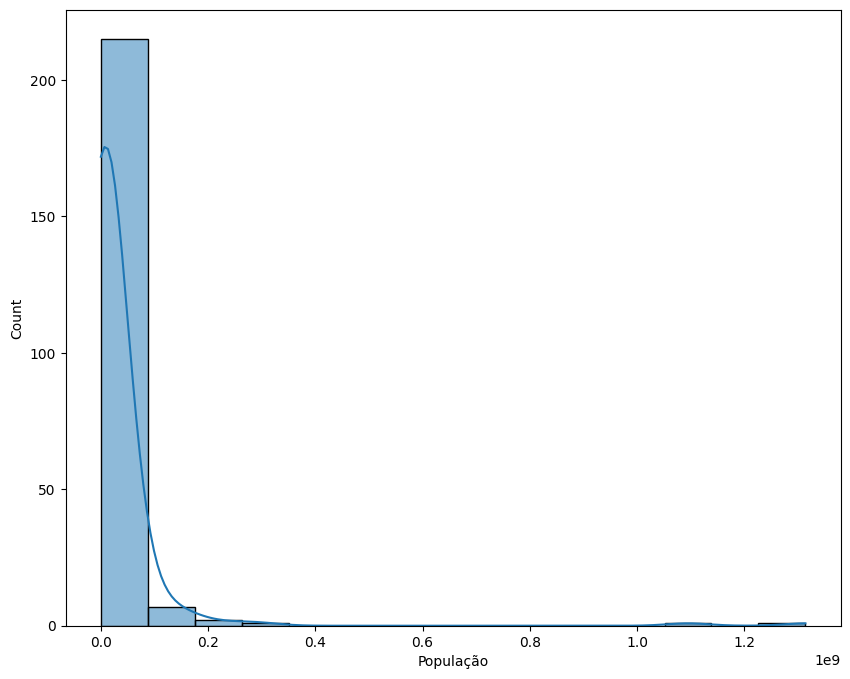

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(dataset['População'], bins=15, kde=True);
plt.show()

In [14]:
# sns.pairplot(dataset);

<Axes: xlabel='População', ylabel='Renda Per capita ($)'>

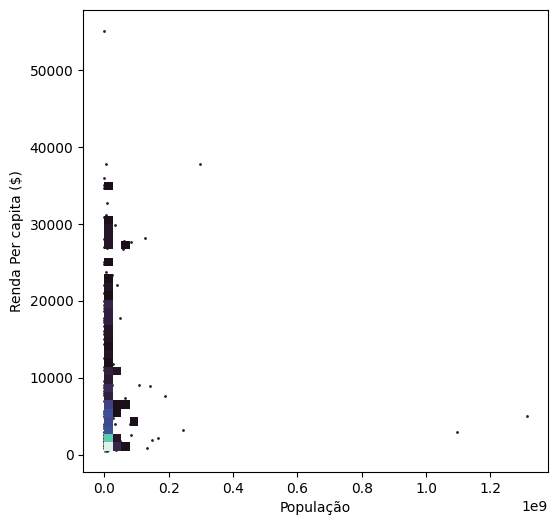

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], s=5, color=".15")
sns.histplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], levels=5, color="w", linewidths=1)

<ipython-input-16-f139d11890c3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
<ipython-input-16-f139d11890c3>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),


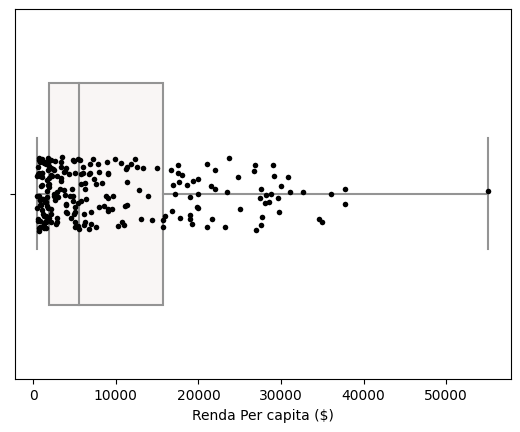

In [16]:
# BOXPLOT DA RENDA PER CAPITA ($) AGRUPADO POR PAÍS

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

<ipython-input-17-954e90e8161a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
<ipython-input-17-954e90e8161a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),


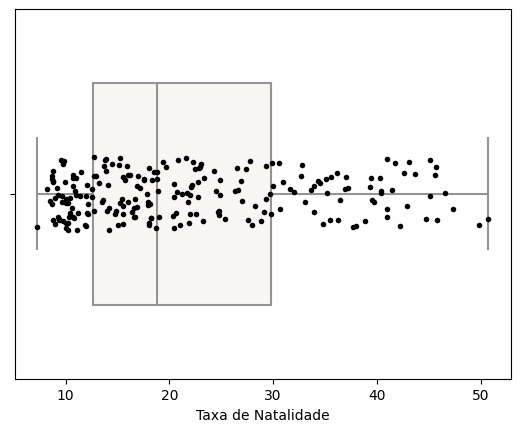

In [17]:
# BOXPLOT DA TAXA DE NATALIDADE AGRUPADO POR PAÍS

sns.boxplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

<ipython-input-18-f062db17c55a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
<ipython-input-18-f062db17c55a>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),


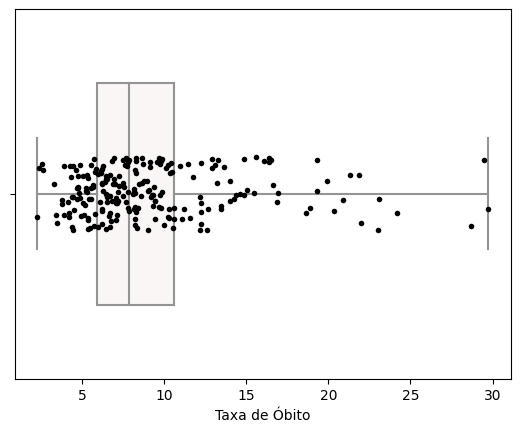

In [18]:
# BOXPLOT DA TAXA DE ÓBITO AGRUPADO POR PAÍS
sns.boxplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

'\n\nPodemos observar que país nos quais a renda per capita ($) é alta, temos maior quantidade de telefones.\n\n'

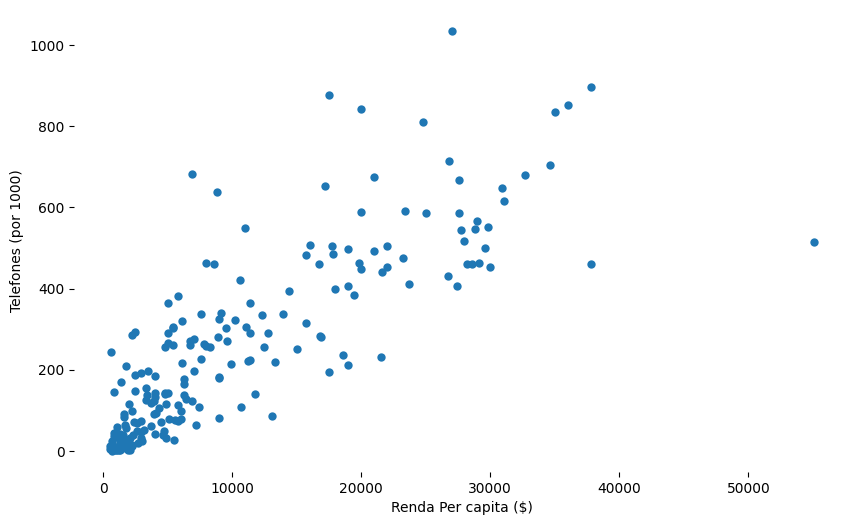

In [19]:
# Scatter do número de telefone (por 1000 habitantes) vs Renda per Capita

f, ax = plt.subplots(figsize=(10, 6))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="Renda Per capita ($)", y="Telefones (por 1000)",
                sizes=(1, 8), linewidth=0,
                data=dataset, ax=ax);

"""

Podemos observar que país nos quais a renda per capita ($) é alta, temos maior quantidade de telefones.

"""

In [20]:
# Salvando o dataset no formato csv (tratado)
dataset.to_csv("countries of the world (tratado).csv", sep=";")

---

# 4. Base (tratada)
## Nessa parte do projeto, trabalhamos com a base tratada, não necessitando realizar os tratamentos posteriores novamente.

---


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [22]:
dataset = pd.read_csv("countries of the world (tratado).csv", sep=";")

In [23]:
dataset.drop(columns="Unnamed: 0", axis = 1, inplace = True)

In [24]:
dataset.head()

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,8.71,6.25


In [25]:
dataset[dataset['Renda Per capita ($)'] >= 20000]

# 29000.0 565.5	

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,11.03,6.68
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,12.14,7.51
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,8.74,9.76
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.0,462.6,10.38,10.27
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,11.40,7.74
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,10.78,7.80
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,12.74,4.89
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,11.13,10.36
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,14.05,8.70
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,10.45,9.86


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 227 non-null    object 
 1   Região                                               227 non-null    object 
 2   População                                            227 non-null    int64  
 3   Área (Km)                                            227 non-null    int64  
 4   Densidade Populacional                               227 non-null    float64
 5   Área Costeira (costa/Área)                           227 non-null    float64
 6   Taxa de Migração                                     224 non-null    float64
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  224 non-null    float64
 8   Renda Per capita ($)                                 226 non-null    f

In [27]:
# Verificando os valores vazios
dataset.isnull().sum()

País                                                    0
Região                                                  0
População                                               0
Área (Km)                                               0
Densidade Populacional                                  0
Área Costeira (costa/Área)                              0
Taxa de Migração                                        3
Taxa de Mortalidade Infantil (por 1000 nascimentos)     3
Renda Per capita ($)                                    1
Taxa de Alfabetização (%)                              18
Telefones (por 1000)                                    4
Taxa de Natalidade                                      3
Taxa de Óbito                                           4
dtype: int64

In [28]:
# Substituindo os valores NaN pela média dos valores de cada coluna

dataset['Renda Per capita ($)'].fillna(np.mean(dataset['Renda Per capita ($)']), inplace = True)
dataset['Taxa de Alfabetização (%)'].fillna(np.mean(dataset['Taxa de Alfabetização (%)']), inplace = True)
dataset['Telefones (por 1000)'].fillna(np.mean(dataset['Telefones (por 1000)']), inplace = True)

dataset['Taxa de Migração'].fillna(np.mean(dataset['Taxa de Migração']), inplace = True)
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].fillna(np.mean(dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)']), inplace = True)
dataset['Taxa de Natalidade'].fillna(np.mean(dataset['Taxa de Natalidade']), inplace = True)
dataset['Taxa de Óbito'].fillna(np.mean(dataset['Taxa de Óbito']), inplace = True)

In [29]:
# Após o tratamendo dos valores faltantes podemos verificar que não temos mais nenhuma coluna com dados missing.

dataset.isnull().sum()

País                                                   0
Região                                                 0
População                                              0
Área (Km)                                              0
Densidade Populacional                                 0
Área Costeira (costa/Área)                             0
Taxa de Migração                                       0
Taxa de Mortalidade Infantil (por 1000 nascimentos)    0
Renda Per capita ($)                                   0
Taxa de Alfabetização (%)                              0
Telefones (por 1000)                                   0
Taxa de Natalidade                                     0
Taxa de Óbito                                          0
dtype: int64

### Regressão Linear Simples (*Telefones* em função da *Renda Per Capita ($)*)

In [30]:
## Vamos dividir a base com os valores que queremos 

from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 8].values
y = dataset.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1) 

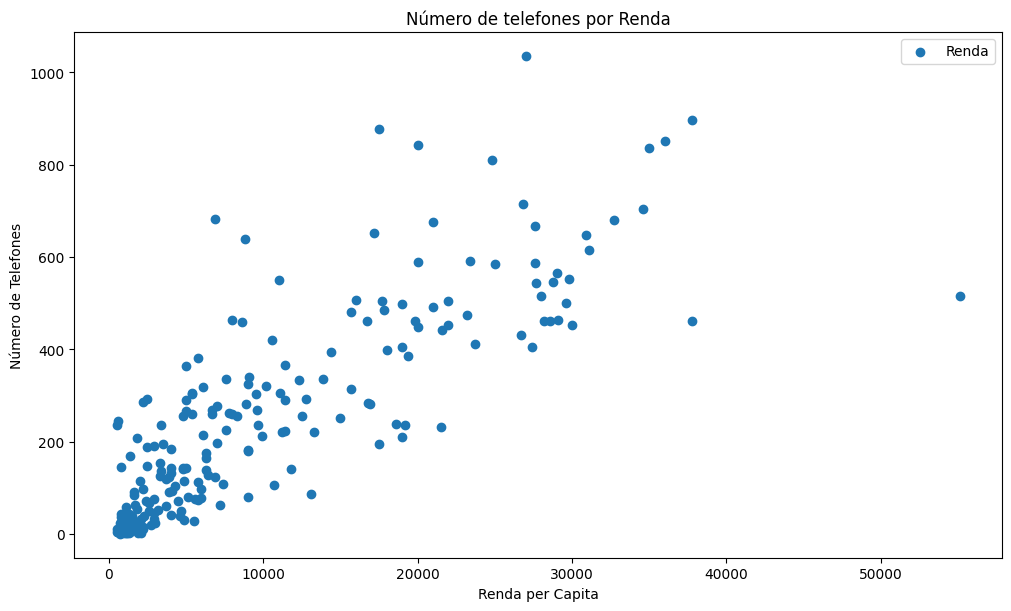

In [31]:
# Vamos agora, realizar o treinamento do modelo de Regressão Linear Simples

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter("Renda Per capita ($)", "Telefones (por 1000)", label = "Renda", data = dataset)
# ax.plot("Renda Per capita ($)", "Telefones (por 1000)", label = "Telefones", data = dataset)
ax.set_title("Número de telefones por Renda")

ax.set_xlabel('Renda per Capita')
ax.set_ylabel('Número de Telefones')
ax.legend();

# Não pode conter Na >>>  ValueError: array must not contain infs or NaNs
# r = pearsonr(X, y)
# print(f'Coeficiente de correlação: {r}')

### treinando o regressor

In [32]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente r2: 0.5037800281144018 



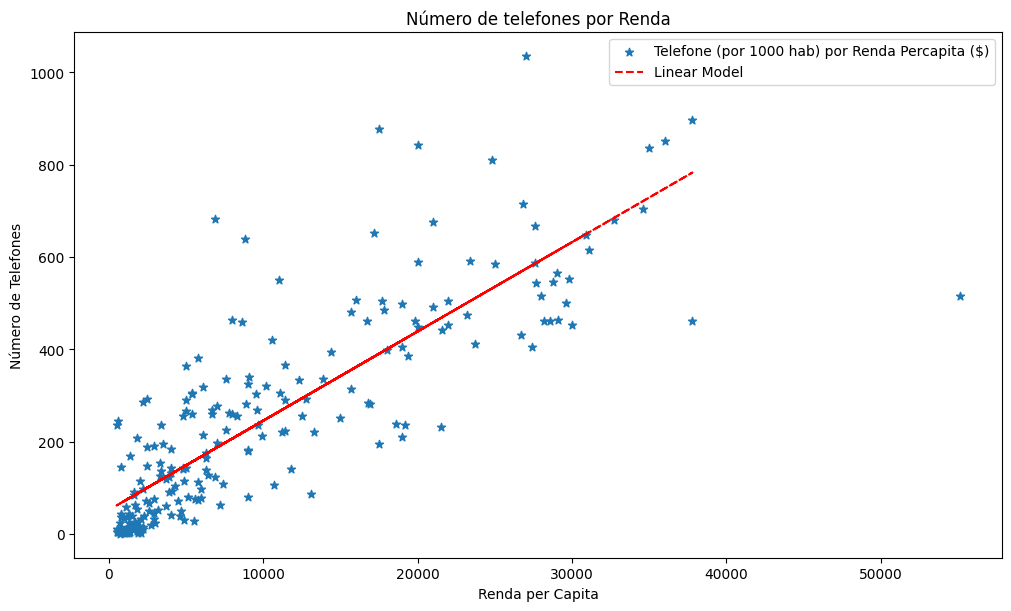

In [33]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}', '\n')

##### GRÁFICO #######
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""


f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = '*', label = 'Telefone (por 1000 hab) por Renda Percapita ($)')
ax.plot(X_test, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Renda per Capita')
ax.set_ylabel('Número de Telefones')
ax.set_title("Número de telefones por Renda")

ax.legend();
plt.show()

In [34]:
# Coeficiente Angular
reg.coef_

array([[0.01934462]])

In [35]:
# Coeficiente Linear
reg.intercept_

array([51.94810757])

In [36]:
## VAMOS ANALISAR O ERRO DO REGRESSOR (Telefones vs Renda Per Capita) 

from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(X_test, pred)
MSE = mean_squared_error(X_test, pred)
RMSE = mean_squared_error(X_test, pred, squared = False)

print(f"O valor do Mean Absolute Error: {MAE:,.3f}")
print(f"O valor do Mean Squared Error: {MSE:,.3f}")
print(f"O valor do Root Mean Squared Error: {RMSE:,.3f}")

O valor do Mean Absolute Error: 8,473.141
O valor do Mean Squared Error: 152,065,707.432
O valor do Root Mean Squared Error: 12,331.493


In [37]:
# Alterando a ordem das colunas >> Região e País passam a ser as últimas colunas 

colunas = dataset.columns.to_list()
colunas = ['População', 'Área (Km)', 'Densidade Populacional', 'Área Costeira (costa/Área)',
 'Taxa de Migração', 'Taxa de Mortalidade Infantil (por 1000 nascimentos)', 'Renda Per capita ($)',
 'Taxa de Alfabetização (%)', 'Telefones (por 1000)', 'Taxa de Natalidade', 'Taxa de Óbito', 'Região', 'País']

dataset = dataset[colunas]

In [38]:
dataset.head()

,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito,Região,País
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34,ASIA (EX. NEAR EAST),Afghanistan
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22,EASTERN EUROPE,Albania
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61,NORTHERN AFRICA,Algeria
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27,OCEANIA,American Samoa
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,8.71,6.25,WESTERN EUROPE,Andorra


In [39]:
# Vamos transformar agora a coluna País em formato numérico
## Neste caso estamos trabalhando com uma variável categórica, e para colocarmos ela em algum modelo, 
## precisamos tranformá-la em variável numérica. Por meio do labelEncoder, podemos realizar esse tipo de transformação

from sklearn.preprocessing import LabelEncoder

y_compl = dataset.iloc[:, 12].values

label_Pais = LabelEncoder()

y_compl = label_Pais.fit_transform(y_compl)

In [40]:
# Podemos observar que agora temos 227 países (0 - 226)
y_compl

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 143, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 191, 174, 175, 176, 177, 178, 17

In [41]:
# convertendo um país (número) para o valor original (categórico)
## Por meio do .inverse_transform podemos verificar quais países, cada número representa 

list(label_Pais.inverse_transform([0, 1, 2, 224, 225, 226])) # ... n ... 

['Afghanistan ', 'Albania ', 'Algeria ', 'Yemen ', 'Zambia ', 'Zimbabwe ']

In [42]:
# Agora vamos adicionar à variável X_compl e selecionar apenas os valores da coluna de índice 10  

X_compl = dataset.iloc[:, 8].values
X_compl

array([3.20000000e+00, 7.12000000e+01, 7.81000000e+01, 2.59500000e+02,
       4.97200000e+02, 7.80000000e+00, 4.60000000e+02, 5.49900000e+02,
       2.20400000e+02, 1.95700000e+02, 5.16100000e+02, 5.65500000e+02,
       4.52200000e+02, 1.37100000e+02, 4.60600000e+02, 2.81300000e+02,
       7.30000000e+00, 4.81900000e+02, 3.19100000e+02, 4.62600000e+02,
       1.15700000e+02, 9.70000000e+00, 8.51400000e+02, 1.43000000e+01,
       7.19000000e+01, 2.15400000e+02, 8.05000000e+01, 2.25300000e+02,
       5.06500000e+02, 2.37200000e+02, 3.36300000e+02, 7.00000000e+00,
       1.01000000e+01, 3.40000000e+00, 2.60000000e+00, 5.70000000e+00,
       5.52200000e+02, 1.69600000e+02, 8.36300000e+02, 2.30000000e+00,
       1.30000000e+00, 2.13000000e+02, 2.66700000e+02, 1.76200000e+02,
       2.45000000e+01, 2.00000000e-01, 3.70000000e+00, 2.89900000e+02,
       3.40700000e+02, 1.46000000e+01, 4.20400000e+02, 7.47000000e+01,
       2.36061435e+02, 3.14300000e+02, 6.14600000e+02, 2.28000000e+01,
      

In [43]:
## Dividimos então em variáveis de treino e variáveis de teste (X e y)

X_train_compl, X_test_compl, y_train_compl, y_test_compl = train_test_split(X_compl, y_compl) 

# Precisamos realizar um Reshaping dos dados.
### O .reshape dá um novo formato ao array utilizado sem que os dados obtidos sejam modificados

X_train_compl = X_train_compl.reshape(-1, 1)
X_test_compl = X_test_compl.reshape(-1, 1)
y_train_compl = y_train_compl.reshape(-1, 1)
y_test_compl = y_test_compl.reshape(-1, 1) 

## E agora treinamos um novo modelo de regressão linear com esses novos dados
reg = LinearRegression().fit(X_train_compl, y_train_compl)
pred = reg.predict(X_test_compl)

Coeficiente r2: -0.01422133236162515 



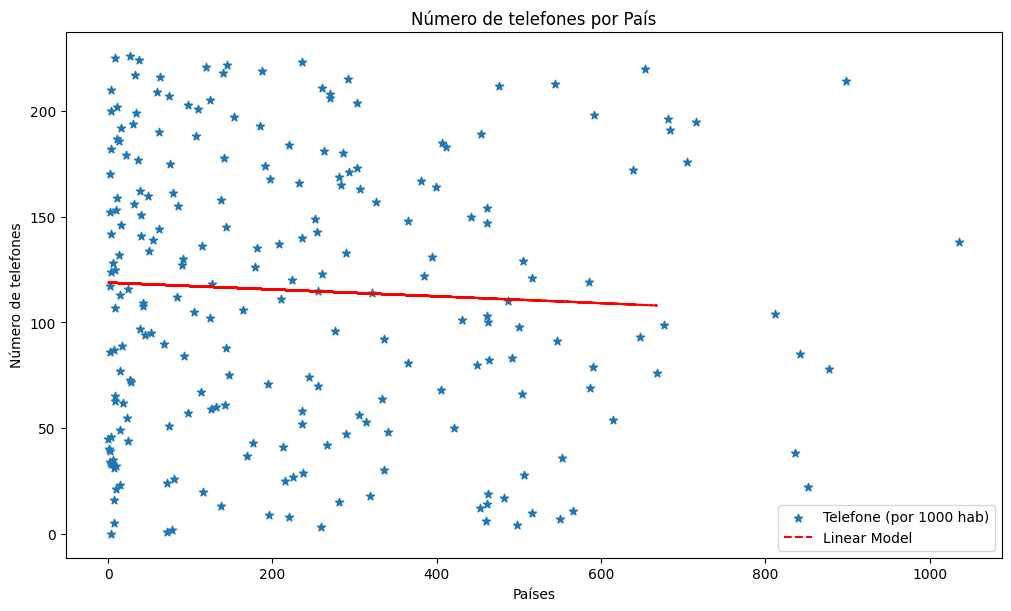

In [44]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_compl, pred)
print(f'Coeficiente r2: {r_squared}', '\n')

##### GRÁFICO #######
"""
Esse modelo foi construído com base em duas colunas. Países e Número de Telefone.
Podemos observar que entre os países não houve uma variação muito significativa.
E aparentemente o número de telefones são bem parecidos entre os países.
"""


f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X_compl, y_compl, marker = '*', label = 'Telefone (por 1000 hab)')
# Com base nos valores de Teste e nos valores previstos, podemos plotar o nosso regressor sobre o
ax.plot(X_test_compl, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Países')
ax.set_ylabel('Número de telefones')
ax.set_title("Número de telefones por País")

ax.legend();
plt.show()

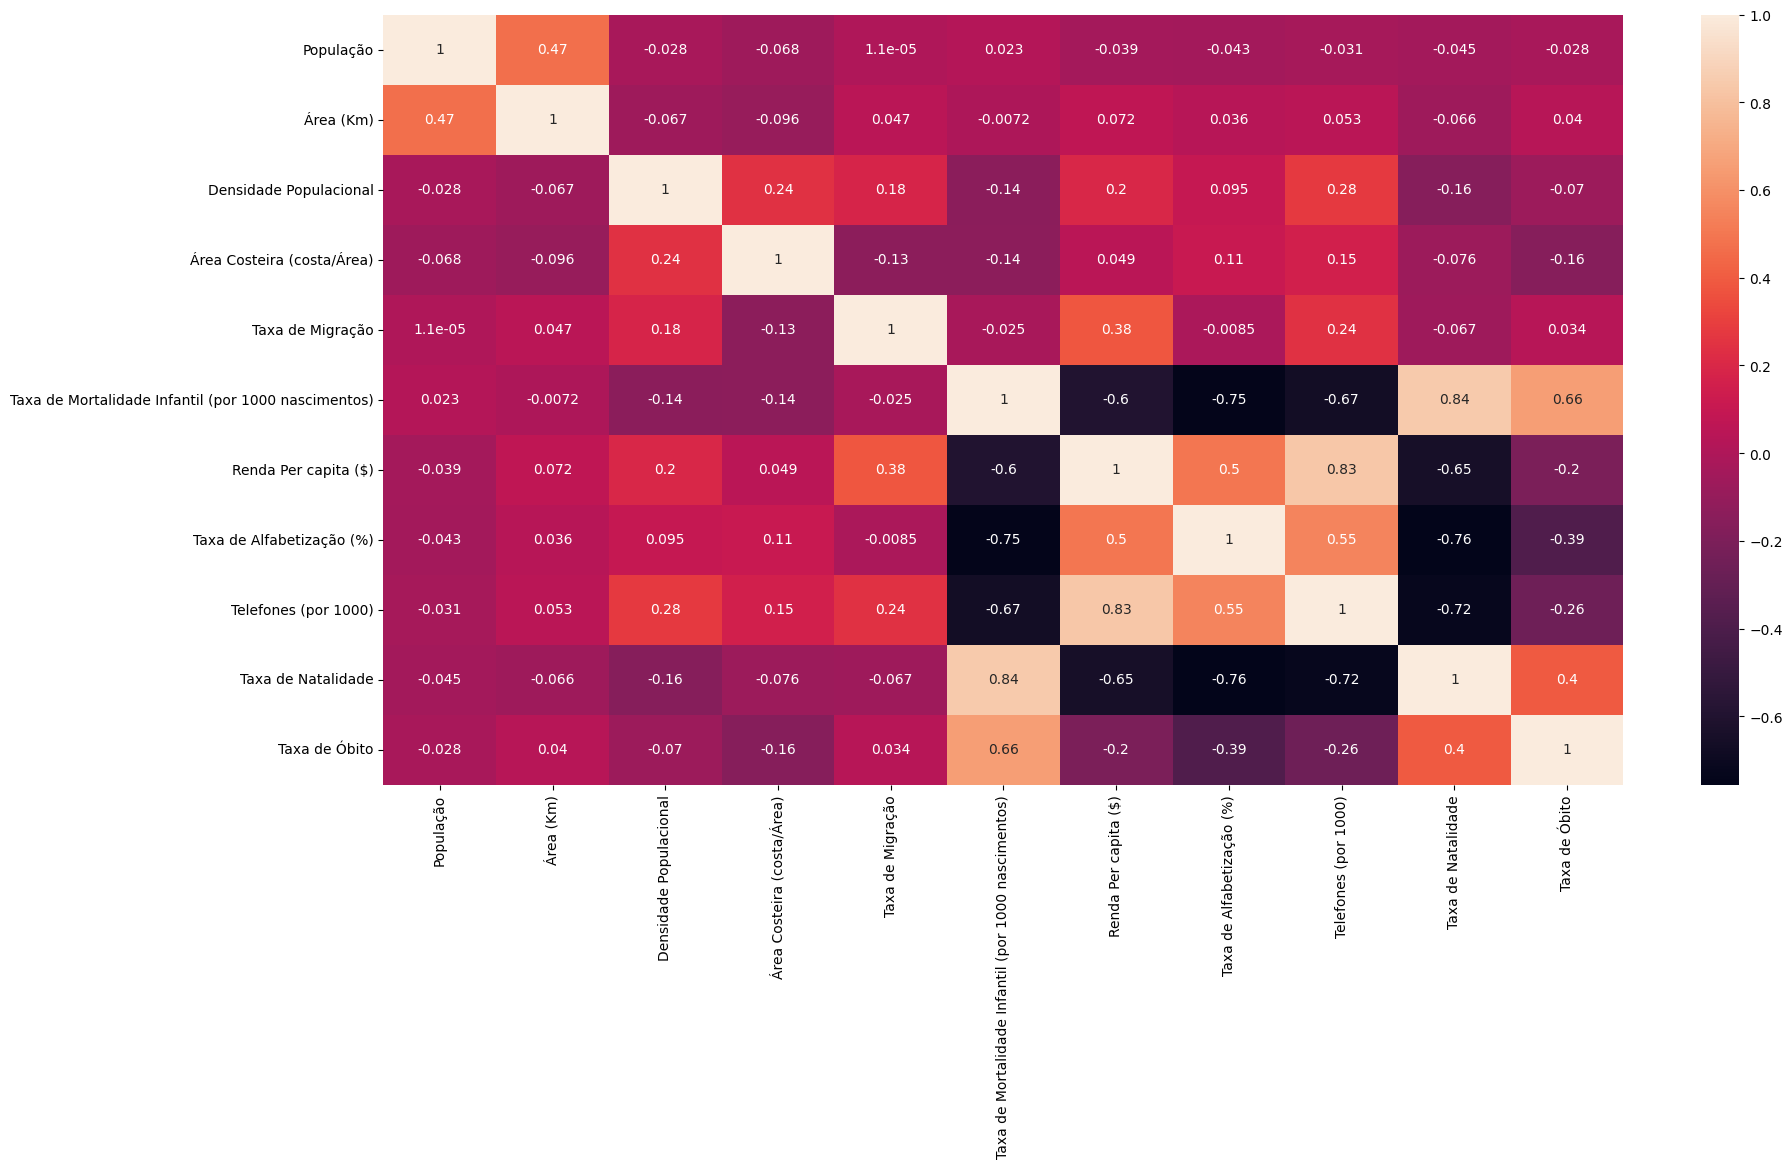

In [45]:
# Heatmap, que mostra a correlação de Pearson para cada coluna do dataframe

"""
Podemos observar que as correlações negativas estão apresentadas na cor mais escura. As correlações negativas, mostram que 
elas são inversamente proporcionais, enquanto uma variável cresce a outra diminui. 

Já as variáveis com correlação positiva, mostram que ambas crescem de forma proporcional aos valores observados.
"""

plt.figure(figsize = (20, 10))
sns.heatmap(dataset.corr(numeric_only = True), annot = True);

---

# 5. Relação entre Atributos

---

## Conceitos

A **Taxa de Mortalidade** é um índice utilizado na demografia, que se refere ao número de mortes registradas - geralmente por mil habitantes -, em determinada unidade geográfica (países, unidades da federação, regiões metropolitanas ou municípios) em um determinado período de tempo

<br />

A **Taxa de Mortalidade Infantil** estima-se o risco 
de um nascido vivo morrer antes de chegar a um ano de vida. Valores elevados refletem precárias condições de vida e saúde e baixo nível de desenvolvimento social e econômico

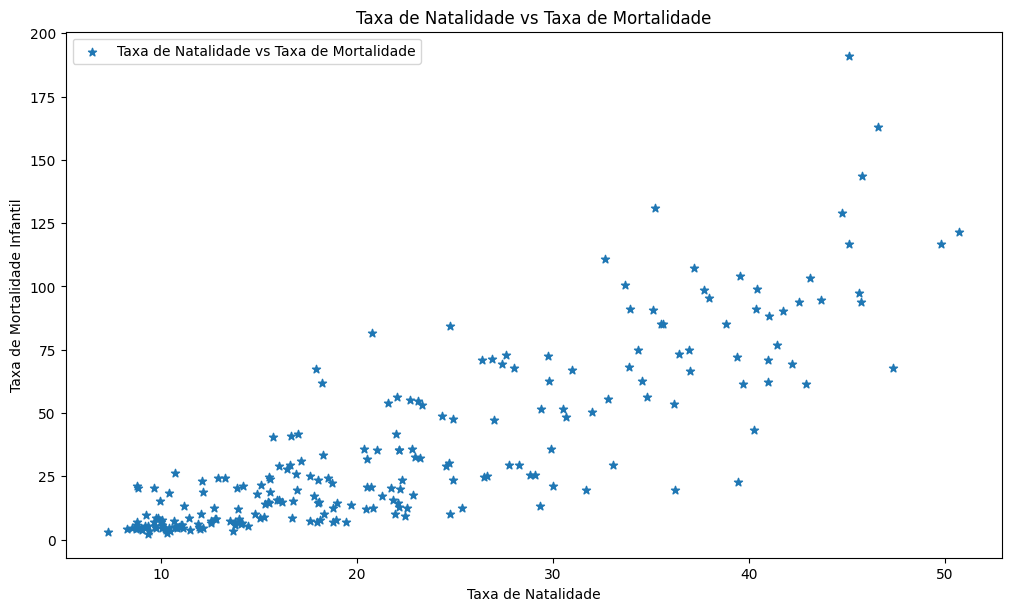

In [46]:
##### GRÁFICO #######
### Vamos verificar a linearidade de taxa da mortalidade com taxa de natalidade
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(dataset['Taxa de Natalidade'].values, dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].values, 
           marker = '*', label = 'Taxa de Natalidade vs Taxa de Mortalidade')

ax.set_xlabel('Taxa de Natalidade')
ax.set_ylabel('Taxa de Mortalidade Infantil')
ax.set_title("Taxa de Natalidade vs Taxa de Mortalidade")

ax.legend();
plt.show()

In [47]:
## Vamos dividir a base com os valores que queremos 
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 9].values
y = dataset.iloc[:, 5].values

X_train_taxa_natalidade, X_test_taxa_natalidade, y_train_taxa_natalidade, y_test_taxa_natalidade = train_test_split(X, y, 
                                                                                                                    test_size = 0.2, 
                                                                                                                    random_state = 42)

# Reshaping data

X_train_taxa_natalidade = X_train_taxa_natalidade.reshape(-1, 1)
X_test_taxa_natalidade = X_test_taxa_natalidade.reshape(-1, 1)
y_train_taxa_natalidade = y_train_taxa_natalidade.reshape(-1, 1)
y_test_taxa_natalidade = y_test_taxa_natalidade.reshape(-1, 1) 

In [48]:
reg = LinearRegression().fit(X_train_taxa_natalidade, y_train_taxa_natalidade)
pred = reg.predict(X_test_taxa_natalidade)

Coeficiente r2: 0.8111063731243587 



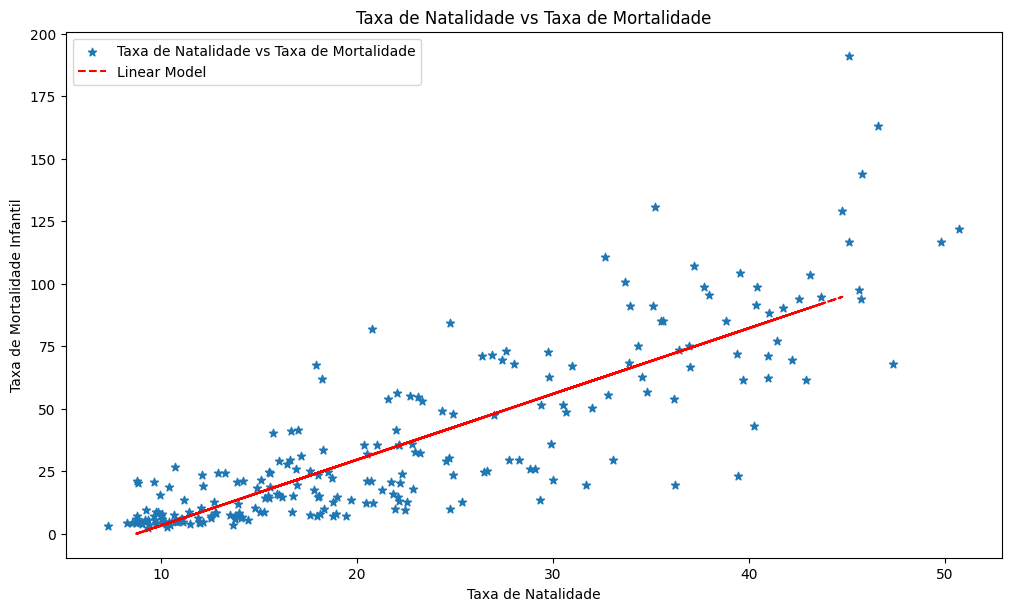

In [49]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_taxa_natalidade, pred)
print(f'Coeficiente r2: {r_squared}', '\n')


##### GRÁFICO #######
### Vamos verificar a linearidade de taxa da mortalidade com taxa de natalidade
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = '*', 
           label = 'Taxa de Natalidade vs Taxa de Mortalidade')
ax.plot(X_test_taxa_natalidade, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Taxa de Natalidade')
ax.set_ylabel('Taxa de Mortalidade Infantil')
ax.set_title("Taxa de Natalidade vs Taxa de Mortalidade")

ax.legend();
plt.show()

In [50]:
# Coeficiente Angular
reg.coef_

array([[2.62974971]])

In [51]:
# Coeficiente Linear
reg.intercept_

array([-23.03142165])

In [52]:
## VAMOS ANALISAR O ERRO DO REGRESSOR (Taxa de Mortalidade vs Taxa de Natalidade)

from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(X_test_taxa_natalidade, pred)
MSE = mean_squared_error(X_test_taxa_natalidade, pred)
RMSE = mean_squared_error(X_test_taxa_natalidade, pred, squared = False)

print(f"O valor do Mean Absolute Error: {MAE:,.2f}")
print(f"O valor do Mean Squared Error: {MSE:,.2f}")
print(f"O valor do Root Mean Squared Error: {RMSE:,.2f}")

"""
Observamos que o erro encontrado nessa regressão analisando a Taxa de Mortalidade em Função da taxa de Natalidade
obteve menores valores de erros. Ou seja, podemos entender que os dados de treinamento se ajustaram de uma maneira melhor
ao modelo de regressão linear.

Uma outra coisa muito importante que podemos analisar também é se existem outliers nesse segundo modelo 
"""

O valor do Mean Absolute Error: 17.75
O valor do Mean Squared Error: 557.50
O valor do Root Mean Squared Error: 23.61


'\nObservamos que o erro encontrado nessa regressão analisando a Taxa de Mortalidade em Função da taxa de Natalidade\nobteve menores valores de erros. Ou seja, podemos entender que os dados de treinamento se ajustaram de uma maneira melhor\nao modelo de regressão linear.\n\nUma outra coisa muito importante que podemos analisar também é se existem outliers nesse segundo modelo \n'

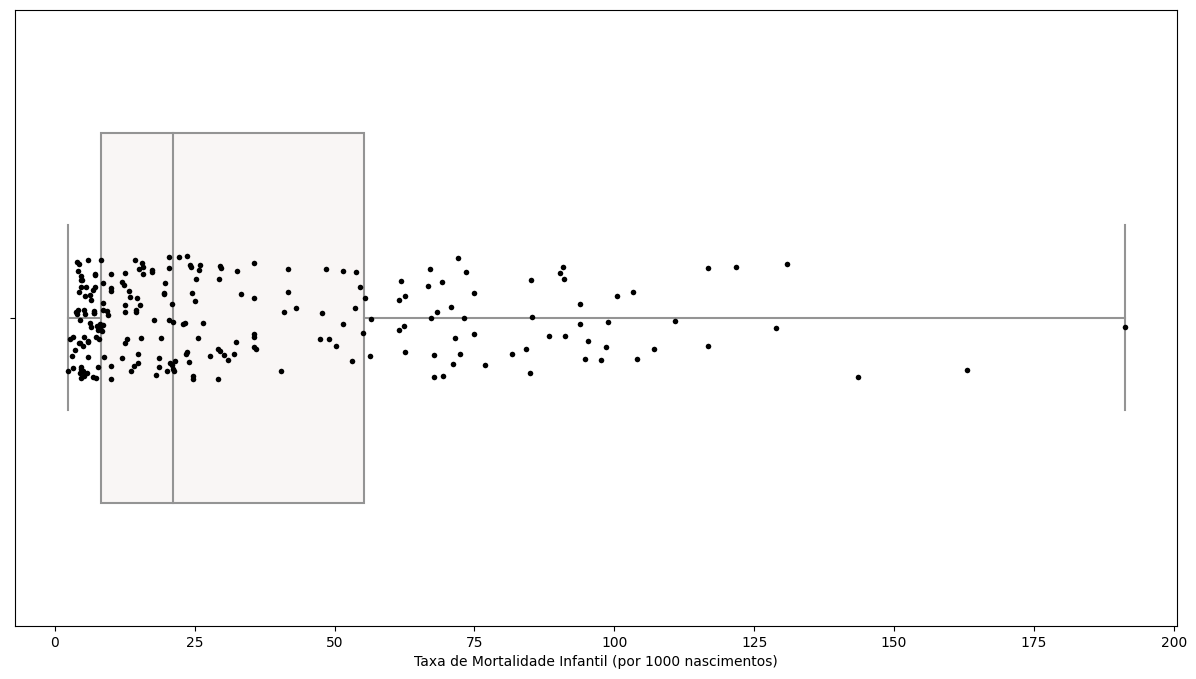

In [53]:
plt.figure(figsize=(15,8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Taxa de Mortalidade Infantil (por 1000 nascimentos)", data=dataset,
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Mortalidade Infantil (por 1000 nascimentos)", data=dataset,
              size=4, color="0", linewidth=0);

plt.show()

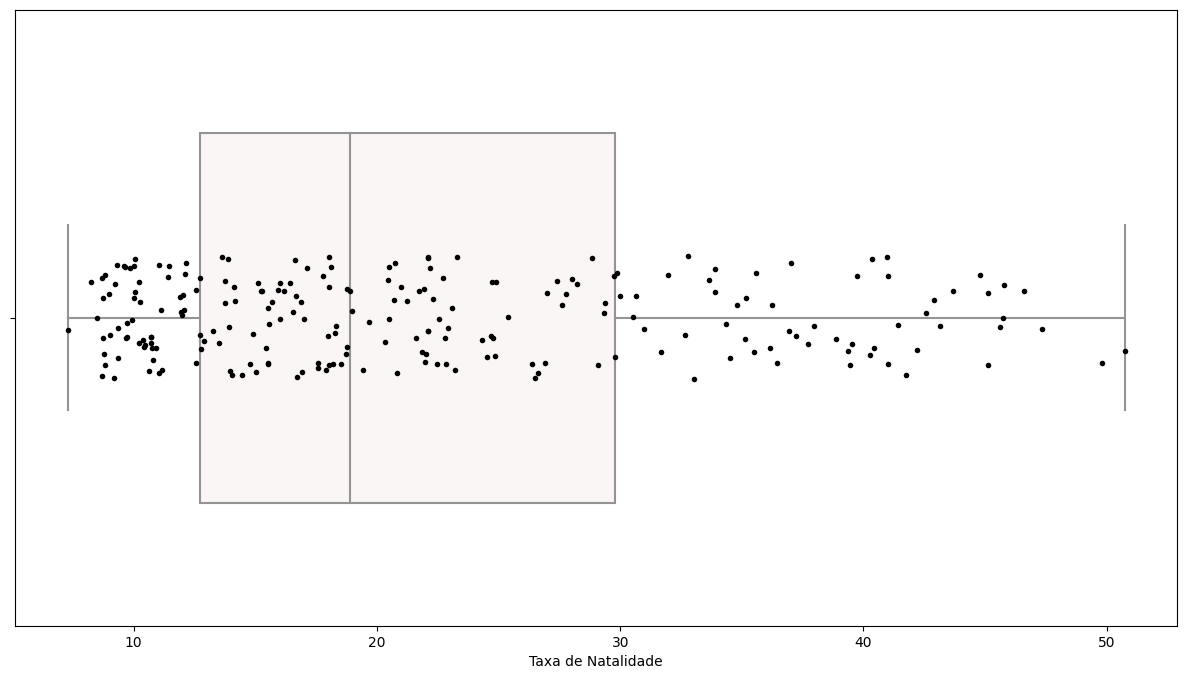

In [54]:
plt.figure(figsize=(15,8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Taxa de Natalidade", data=dataset,
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Natalidade", data=dataset,
              size=4, color="0", linewidth=0);

plt.show()

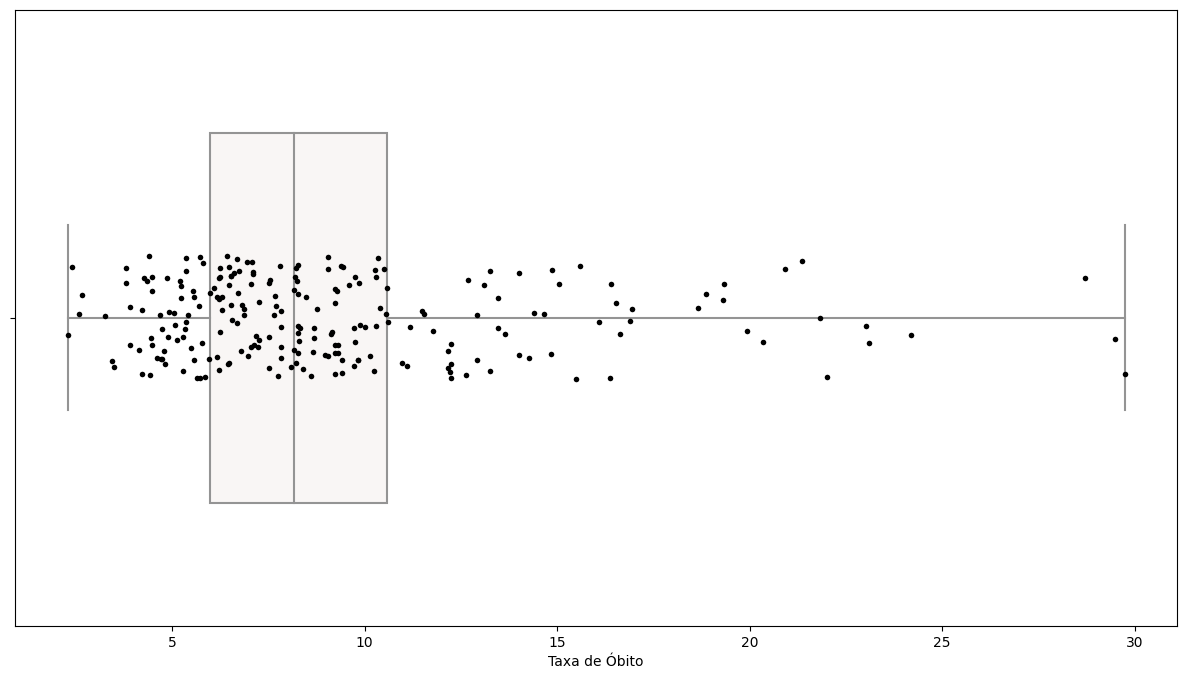

In [55]:
plt.figure(figsize=(15,8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Taxa de Óbito", data=dataset,
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Óbito", data=dataset,
              size=4, color="0", linewidth=0);

plt.show()

In [56]:
## Estatística Descritiva

dataset[['População', 'Taxa de Mortalidade Infantil (por 1000 nascimentos)', 'Taxa de Natalidade', 'Taxa de Óbito']].describe()

,População,Taxa de Mortalidade Infantil (por 1000 nascimentos),Taxa de Natalidade,Taxa de Óbito
count,2.270000e+02,227.000000,227.000000,227.000000
mean,2.874028e+07,35.506964,22.114732,9.241345
std,1.178913e+08,35.154225,11.102286,4.945670
min,7.026000e+03,2.290000,7.290000,2.290000
25%,4.376240e+05,8.215000,12.725000,5.975000
50%,4.786994e+06,21.050000,18.900000,8.170000
75%,1.749777e+07,55.335000,29.770000,10.580000
max,1.313974e+09,191.190000,50.730000,29.740000


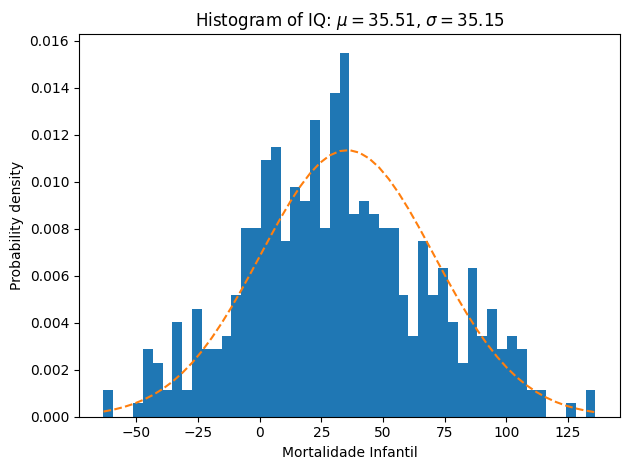

In [57]:
fig, ax = plt.subplots()

# example data
mu = 35.506964  # média da distribuição de mortalidade infantil
sigma = 35.15  # desvio padrão dos dados de mortalidade infantil
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

ax.set_xlabel('Mortalidade Infantil')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=35.51$, $\sigma=35.15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

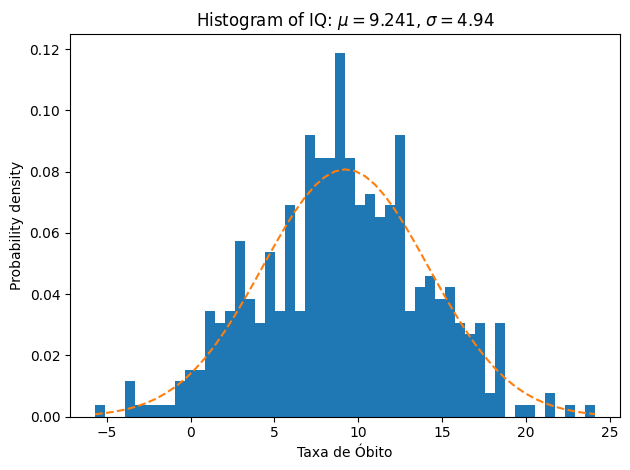

In [58]:
fig, ax = plt.subplots()

# example data
mu = 9.241345  # média da distribuição da taxa de óbito
sigma = 4.94  # desvio padrão dos dados da taxa de óbito
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

ax.set_xlabel('Taxa de Óbito')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=9.241$, $\sigma=4.94$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

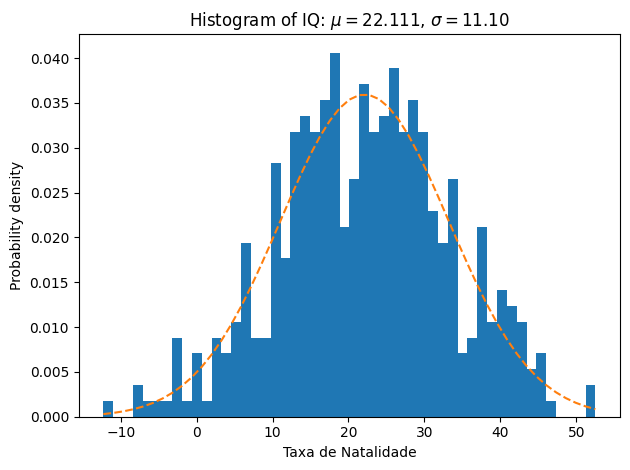

In [59]:
fig, ax = plt.subplots()

# example data
mu = 22.114732  # média da distribuição da taxa de Natalidade
sigma = 11.10  # desvio padrão dos dados da taxa de Natalidade
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

ax.set_xlabel('Taxa de Natalidade')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=22.111$, $\sigma=11.10$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()



---


#6. Clusterização


---



In [60]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.cluster import KMeans # algoritmo de machine learning muito utilizado na clusterização de dados 
from sklearn.cluster import AgglomerativeClustering # utilizado para aglomerar par de dados de forma recursiva de um dataset
from sklearn.preprocessing import StandardScaler # utilizado para a normalização dos dados
from sklearn.decomposition import PCA # utilizado para a redução de dimensionalidade dos dados. Sem perda de informação

In [61]:
dataset['Região']

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
                      ...                 
222    NEAR EAST                          
223    NORTHERN AFRICA                    
224    NEAR EAST                          
225    SUB-SAHARAN AFRICA                 
226    SUB-SAHARAN AFRICA                 
Name: Região, Length: 227, dtype: object

In [62]:
y_regiao = dataset.iloc[:, 12].values

label_Regiao = LabelEncoder()

y_regiao = label_Regiao.fit_transform(y_regiao)

In [63]:
y_regiao

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 143, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 191, 174, 175, 176, 177, 178, 17

In [64]:
list(label_Pais.inverse_transform([0, 1, 2, 224, 225, 226]))

['Afghanistan ', 'Albania ', 'Algeria ', 'Yemen ', 'Zambia ', 'Zimbabwe ']

In [65]:
# Taxa de Óbito
dataset.iloc[:, 10]

0      20.340000
1       5.220000
2       4.610000
3       3.270000
4       6.250000
         ...    
222     3.920000
223     9.241345
224     8.300000
225    19.930000
226    21.840000
Name: Taxa de Óbito, Length: 227, dtype: float64

In [66]:
# Taxa de Natalidade
dataset.iloc[:, 9]

0      46.600000
1      15.110000
2      17.140000
3      22.460000
4       8.710000
         ...    
222    31.670000
223    22.114732
224    42.890000
225    41.000000
226    28.010000
Name: Taxa de Natalidade, Length: 227, dtype: float64

In [67]:
dataset.iloc[:, 8]

0        3.200000
1       71.200000
2       78.100000
3      259.500000
4      497.200000
          ...    
222    145.200000
223    236.061435
224     37.200000
225      8.200000
226     26.800000
Name: Telefones (por 1000), Length: 227, dtype: float64

In [68]:
dataset.iloc[:, 7]

0       36.000000
1       86.500000
2       70.000000
3       97.000000
4      100.000000
          ...    
222     82.838278
223     82.838278
224     50.200000
225     80.600000
226     90.700000
Name: Taxa de Alfabetização (%), Length: 227, dtype: float64

In [69]:
dataset.iloc[:, 6]

0        700.000000
1       4500.000000
2       6000.000000
3       8000.000000
4      19000.000000
           ...     
222      800.000000
223     9689.823009
224      800.000000
225      800.000000
226     1900.000000
Name: Renda Per capita ($), Length: 227, dtype: float64

In [70]:
dataset.iloc[:, 5]

0      163.070000
1       21.520000
2       31.000000
3        9.270000
4        4.050000
          ...    
222     19.620000
223     35.506964
224     61.500000
225     88.290000
226     67.690000
Name: Taxa de Mortalidade Infantil (por 1000 nascimentos), Length: 227, dtype: float64

In [71]:
dataset = dataset.copy()
X = dataset.iloc[:, 5:11].values

X

array([[1.6307e+02, 7.0000e+02, 3.6000e+01, 3.2000e+00, 4.6600e+01,
        2.0340e+01],
       [2.1520e+01, 4.5000e+03, 8.6500e+01, 7.1200e+01, 1.5110e+01,
        5.2200e+00],
       [3.1000e+01, 6.0000e+03, 7.0000e+01, 7.8100e+01, 1.7140e+01,
        4.6100e+00],
       ...,
       [6.1500e+01, 8.0000e+02, 5.0200e+01, 3.7200e+01, 4.2890e+01,
        8.3000e+00],
       [8.8290e+01, 8.0000e+02, 8.0600e+01, 8.2000e+00, 4.1000e+01,
        1.9930e+01],
       [6.7690e+01, 1.9000e+03, 9.0700e+01, 2.6800e+01, 2.8010e+01,
        2.1840e+01]])

In [72]:
# Estamos reduzindo os dados para apenas 2 dimensões (2D)
# utilizando apenas as colunas de taxa de natalidade e taxa de mortalidade
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [73]:
# vamos utilizar para dividirmos em 3 grupos (3 clusteres)
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

In [74]:
# A variável X agora contem ambos os valores a Taxa de Natalidade e a Taxa de Óbito.
# Os valores previstos serão adicionados a variável rotulos, que irá conter a qual grupo cada linha que o nosso modelo previu
# pertence

dataframe = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = dataframe.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [75]:
# podemos observar os grupos formados 
rotulos

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0])

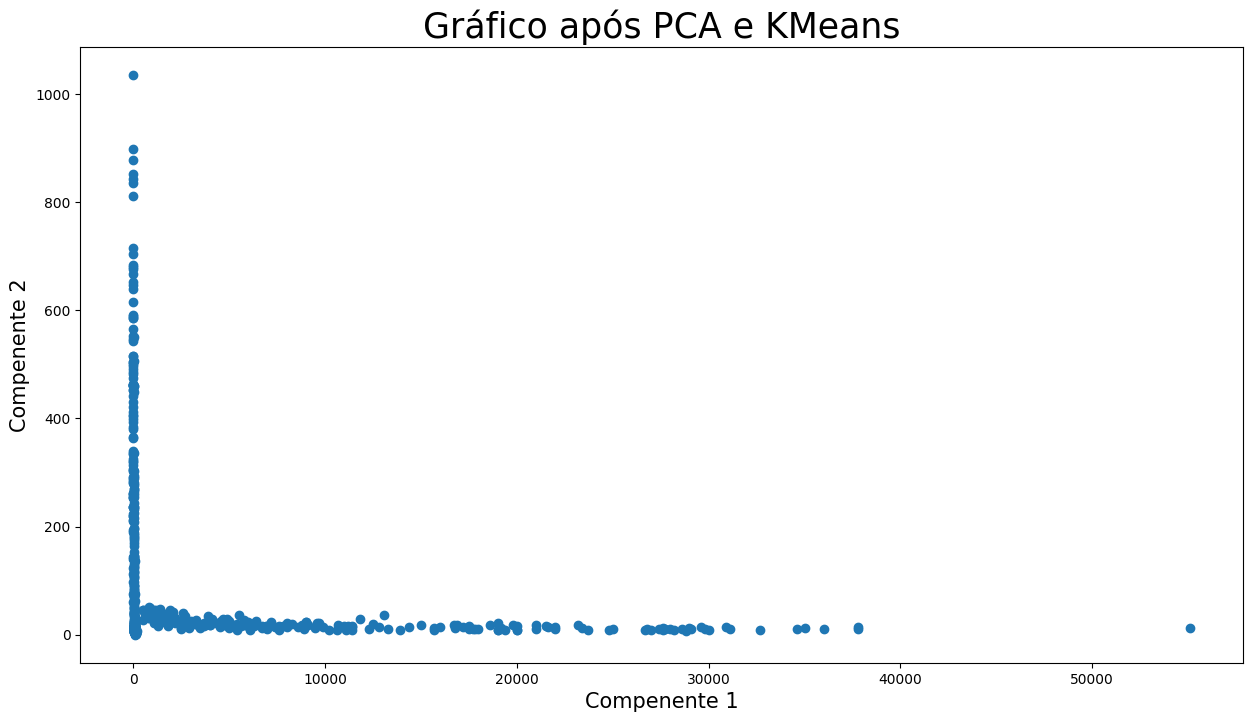

In [76]:
plt.figure(figsize=(15,8))
plt.scatter(x = X[:,0:3], y = X[:, 3:6])
plt.title("Gráfico após PCA e KMeans", fontsize = 25)
plt.xlabel("Compenente 1", fontsize = 15)
plt.ylabel("Compenente 2", fontsize = 15)
plt.show()

In [77]:
"""
Para que não haja bias de importância com o nosso dataset, podemos normalizar os dados. 
A normalização permite que os valores sejam colocados dentro de uma mesma escala, e impede que seja dado maior importância
para dados que tenham valores maiores.
"""

dados_normalizados = StandardScaler()
dataset_normalizado = dados_normalizados.fit_transform(X)

dataset_normalizado

array([[ 3.63668782, -0.89855358, -2.48100371, -1.03279643,  2.21029964,
         2.2490751 ],
       [-0.39875362, -0.5187348 ,  0.19395989, -0.73120009, -0.63232132,
        -0.81490125],
       [-0.12848881, -0.36880633, -0.68003812, -0.70059693, -0.44907202,
        -0.93851405],
       ...,
       [ 0.74103408, -0.88855835, -1.72883573, -0.88199826,  1.87539574,
        -0.19075792],
       [ 1.50478877, -0.88855835, -0.11856061, -1.01062023,  1.70478432,
         2.16599109],
       [ 0.91750446, -0.77861081,  0.41643211, -0.92812476,  0.53216932,
         2.55304101]])

In [78]:
kmeans_normalizados = KMeans(n_clusters=3)
kmeans_normalizados.fit(dataset_normalizado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

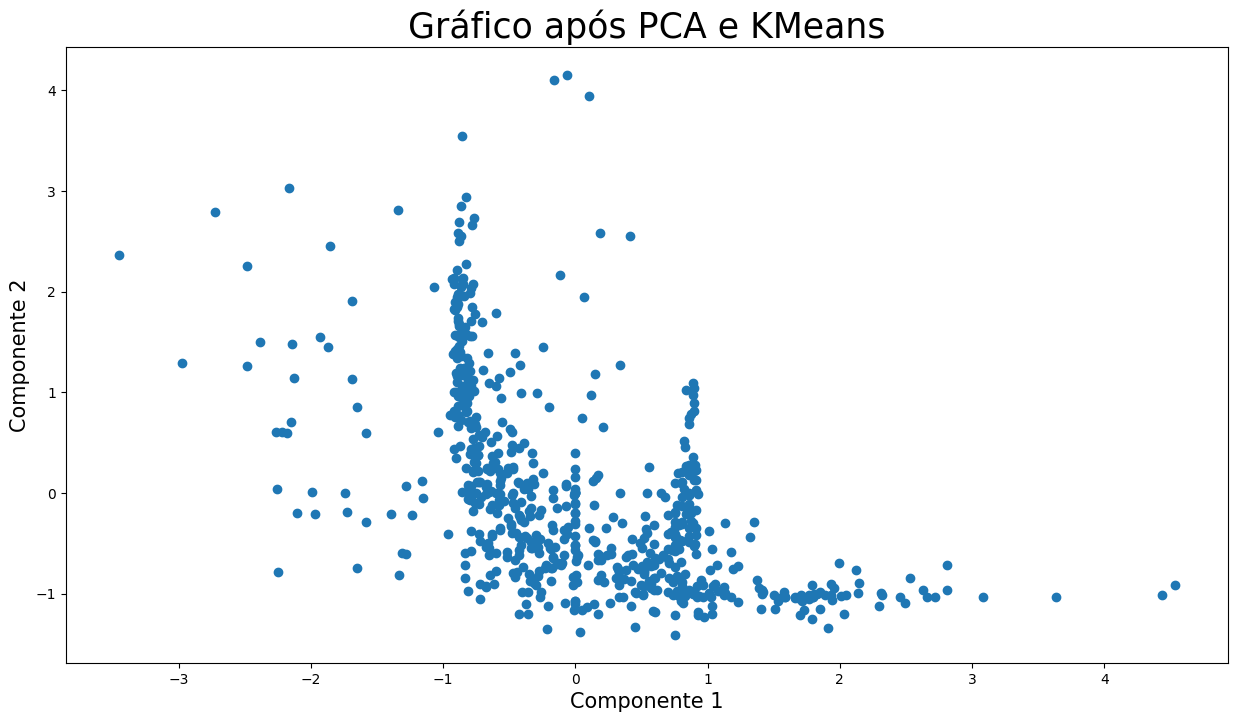

In [79]:
"""
Observe que o gráfico permanece o mesmo, mas a escala na qual ele está sendo apresentado mudou
"""

plt.figure(figsize=(15,8))
plt.scatter(x = dataset_normalizado[:,0:3], y = dataset_normalizado[:, 3:6])
plt.title("Gráfico após PCA e KMeans", fontsize = 25)
plt.xlabel("Componente 1", fontsize = 15)
plt.ylabel("Componente 2", fontsize = 15)
plt.show()

In [80]:
"""
O atributo cluster_centers_ gera de forma randômica centros aleatórios para começar a calcular a distância euclidiana entre cada um dos dados
Isso é o que permite a geração dos clusteres. Por exemplo, como colocamos n_clusters=3 geramos 3 pontos aleatórios no gráfico
Onde 0.37272793 corresponde ao valor de X do primeiro centro e -0.63520397 corresponde ao valor do Y do primeiro centro.

Portanto 3 centros foram gerados e aqui apresentamos as coordenados do plano cartesiano para cada uma delas
"""

centroides = kmeans_normalizados.cluster_centers_
centroides

array([[ 1.4760673 , -0.78297236, -1.26844509, -0.97141271,  1.38018768,
         1.21780168],
       [-0.81760614,  1.36512047,  0.68064431,  1.35728635, -0.9404992 ,
        -0.16159048],
       [-0.28206961, -0.36224206,  0.25446106, -0.26456548, -0.16702586,
        -0.51461327]])

In [81]:
rotulos = kmeans_normalizados.labels_
rotulos

array([0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 0, 0], dtype=int32)

In [82]:
"""
Podemos observar os clusteres por meio de um gráfico interativo onde os valores são apresentados ao se mover o mouse.
O gráfico da dispersão foi realizados conforme o dataset-normalizado que geramos utilizando o StandardScaler.

Como observamos, geramos centros aleatórios para a criação dos clusteres, e podemos observá-los. 

A primeira linha `grafico1` mostra a dispersão dos dados normalizados; Já o `grafico2` plota os centros gerados
A terceira linha `grafico3` sobrepoem ambos os gráficos ao mesmo plano cartesiano, sendo assim possível observar os dois graficos
"""

grafico1 = px.scatter(x = dataset_normalizado[:,0], y = dataset_normalizado[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [7, 7, 7])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

Uma dos atributos de maior importância para o KMeans e qualquer outro algortimo de clusterização é encontrar o número idela de clusters a serem gerados para aquele determinado dataset. 

Por isso aqui não utilizamos o número 3 de forma aleatória. Utilizando a técnica do `Elbow Methos`, e utilizando a API `yellowbrick` podemos plotar o número ideal de clusters que irão de uma melhor forma representar os dados existentes neste dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

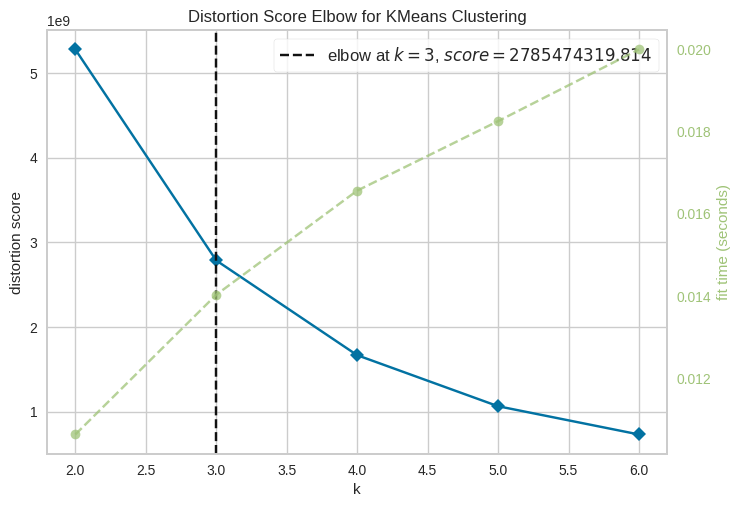

In [83]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(kmeans_normalizados)
visualizer = KElbowVisualizer(model, k=6, metric="distortion")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() ;

In [84]:
visualizer.elbow_score_

2785474319.81352

Neste gráfico podemos observar duas coisas. A linha azul, representa o número de clusteres que foram gerados e a linha verde representa o tempo de treinamento para cada cluster. Por maior que seja o número de clusteres o tempo de treinamento é maior (quando `k` >= 4), não sendo a quantidade de clusteres ideal para esse dataset.

O inverso é encontrado quando `k` = 2, não tendo um tempo de treinamento adequado.

A API leve também em consideração o nível de distorção - que segundo a documentação calcula a média da somatória ao quadrado da distância de cada centro - para a escolha do número ideal de clusteres. Com isso podemos observar que o número ideal de clusteres.



---

# 7. Regression Discontinuity Design

---



In [85]:
"""
Por meio desta sessão, iremos analisar se a causa [aumentar a Taxa de Natalidade] da taxa de Natalidade 
podem ser resultado da Taxa de Mortalidade Infantil [aumentar o número de mortes infantil menores de 1 ano]
"""

'\nPor meio desta sessão, iremos analisar se a causa [aumentar a Taxa de Natalidade] da taxa de Natalidade \npodem ser resultado da Taxa de Mortalidade Infantil [aumentar o número de mortes infantil menores de 1 ano]\n'

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [87]:
dataset.columns

Index(['População', 'Área (Km)', 'Densidade Populacional',
       'Área Costeira (costa/Área)', 'Taxa de Migração',
       'Taxa de Mortalidade Infantil (por 1000 nascimentos)',
       'Renda Per capita ($)', 'Taxa de Alfabetização (%)',
       'Telefones (por 1000)', 'Taxa de Natalidade', 'Taxa de Óbito', 'Região',
       'País'],
      dtype='object')

In [88]:
dataset.drop(columns=['Área (Km)', 'Área Costeira (costa/Área)', 'Taxa de Migração',
                       'Taxa de Alfabetização (%)', 'Telefones (por 1000)', 'Região'], axis = 1, inplace = True)

In [89]:
dataset.head()

,População,Densidade Populacional,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Natalidade,Taxa de Óbito,País
0,31056997,48.0,163.07,700.0,46.60,20.34,Afghanistan
1,3581655,124.6,21.52,4500.0,15.11,5.22,Albania
2,32930091,13.8,31.00,6000.0,17.14,4.61,Algeria
3,57794,290.4,9.27,8000.0,22.46,3.27,American Samoa
4,71201,152.1,4.05,19000.0,8.71,6.25,Andorra


In [90]:
dataset.columns =  ['População', 'Densidade_Populacional', 'Taxa_de_Mortalidade_Infantil',  'Renda_Per_capita_($)',
                    'Taxa_de_Natalidade', 'Taxa_de_Óbito', 'País']

In [91]:
dataset.head()

,População,Densidade_Populacional,Taxa_de_Mortalidade_Infantil,Renda_Per_capita_($),Taxa_de_Natalidade,Taxa_de_Óbito,País
0,31056997,48.0,163.07,700.0,46.60,20.34,Afghanistan
1,3581655,124.6,21.52,4500.0,15.11,5.22,Albania
2,32930091,13.8,31.00,6000.0,17.14,4.61,Algeria
3,57794,290.4,9.27,8000.0,22.46,3.27,American Samoa
4,71201,152.1,4.05,19000.0,8.71,6.25,Andorra


In [92]:
dataset['Taxa_de_Natalidade'].describe()

count    227.000000
mean      22.114732
std       11.102286
min        7.290000
25%       12.725000
50%       18.900000
75%       29.770000
max       50.730000
Name: Taxa_de_Natalidade, dtype: float64

In [93]:
# Avaliando Polinomial com Taxa de Natalidade
 
mod = smf.ols(formula = "Taxa_de_Natalidade ~ Taxa_de_Óbito + Taxa_de_Mortalidade_Infantil + População + Densidade_Populacional + I(Taxa_de_Natalidade > 22.11)", data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Taxa_de_Natalidade   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     287.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.33e-94
Time:                        21:25:16   Log-Likelihood:                -639.24
No. Observations:                 227   AIC:                             1290.
Df Residuals:                     221   BIC:                             1311.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

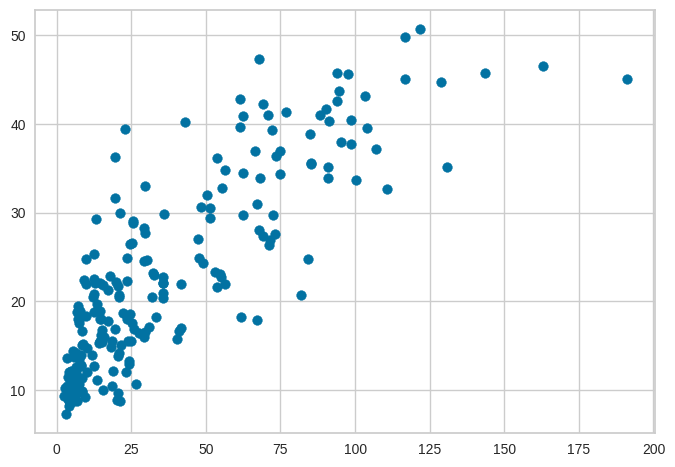

In [94]:
plt.scatter(dataset['Taxa_de_Mortalidade_Infantil'], dataset['Taxa_de_Natalidade']);

In [95]:
# Plotting fit

# Getting standard errors
prob_se = res.get_prediction().summary_frame()
prob_se['Taxa_de_Natalidade'] = dataset['Taxa_de_Natalidade']
prob_se.sort_values(by='Taxa_de_Natalidade',inplace=True,ignore_index=True)

low = prob_se[prob_se['Taxa_de_Natalidade'] <= 29.50].copy()
high = prob_se[prob_se['Taxa_de_Natalidade'] > 29.50].copy()

In [96]:
prob_se

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Taxa_de_Natalidade
0,11.359299,1.027495,9.334357,13.384241,3.033152,19.685447,7.29
1,10.717490,0.506573,9.719158,11.715821,2.579860,18.855119,8.25
2,10.607145,2.623717,5.436438,15.777853,1.017539,20.196752,8.48
3,12.776533,0.390744,12.006473,13.546594,4.663745,20.889322,8.71
4,11.246112,0.470100,10.319659,12.172565,3.116988,19.375236,8.72
...,...,...,...,...,...,...,...
222,44.668015,0.978261,42.740102,46.595929,36.364932,52.971099,45.76
223,49.774260,1.154613,47.498799,52.049721,41.383666,58.164854,46.60
224,33.546114,0.427705,32.703211,34.389017,25.426087,41.666140,47.35
225,41.739241,0.707974,40.343997,43.134484,33.543446,49.935035,49.82


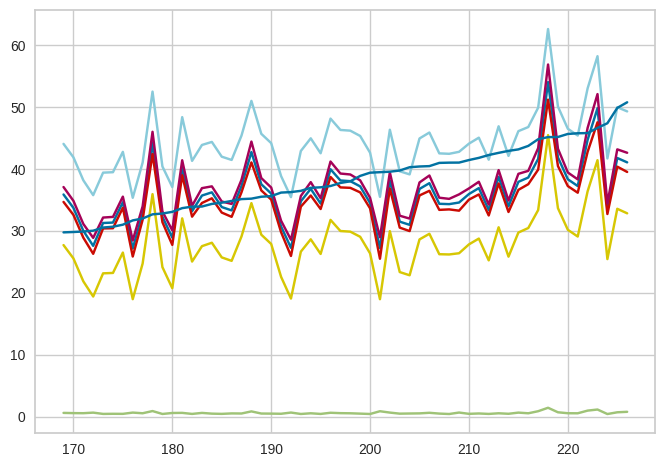

In [97]:
plt.plot(high);

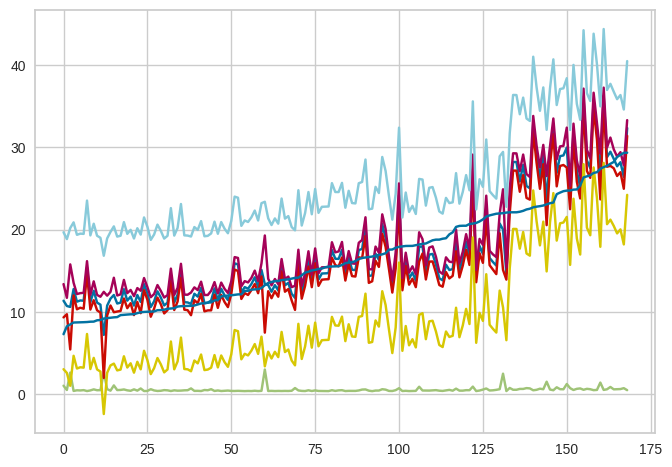

In [98]:
plt.plot(low);

Text(0.5, 1.0, 'RDD Reduced Cost Estimate 8 to 11')

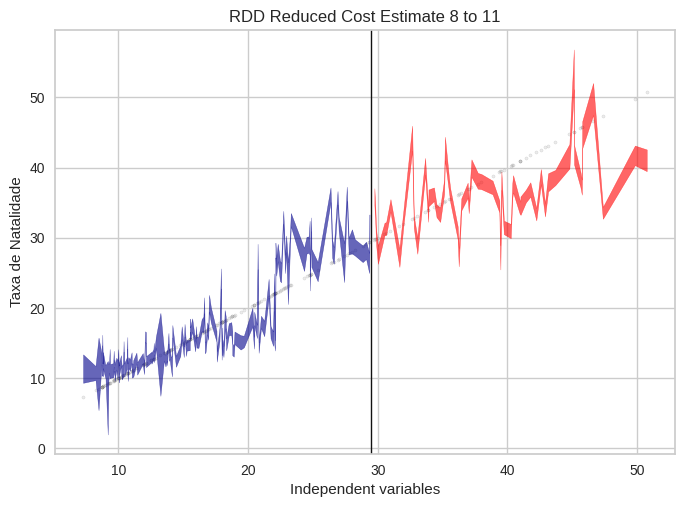

In [99]:
# Getting effect for threshold bump
coef = res.summary2().tables[1]
ci = coef.iloc[1,4:6].astype(int).to_list()

fig, ax = plt.subplots()

ax.scatter(dataset['Taxa_de_Natalidade'], dataset['Taxa_de_Natalidade'], c='grey',
           edgecolor='k', alpha=0.15, s=5, zorder=1)

ax.axvline(29.50, linestyle='solid', alpha=1.0, 
           color='k',linewidth=1, zorder=2)

ax.fill_between(low['Taxa_de_Natalidade'],low['mean_ci_lower'],
                low['mean_ci_upper'],alpha=0.6,
                zorder=3, color='darkblue')

ax.fill_between(high['Taxa_de_Natalidade'],high['mean_ci_lower'],
                high['mean_ci_upper'],alpha=0.6,
                zorder=3, color='red')

ax.set_xlabel('Independent variables')
ax.set_ylabel('Taxa de Natalidade')
ax.set_title(f'RDD Reduced Cost Estimate {ci[0]} to {ci[1]}')

In [100]:
"""
Temos como resultado um gráfico que mostra alta multicolinearidade
"""

'\nTemos como resultado um gráfico que mostra alta multicolinearidade\n'



---
7.1 - Será que podemos explicar a taxa de Óbito pela população ?

---




In [101]:
# Avaliando Polinomial com Taxa de Natalidade
 
mod = smf.ols(formula = "Taxa_de_Óbito ~ Taxa_de_Natalidade + População + Densidade_Populacional + I(Taxa_de_Óbito > 13.00)", data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Taxa_de_Óbito   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           3.36e-51
Time:                        21:25:19   Log-Likelihood:                -561.21
No. Observations:                 227   AIC:                             1132.
Df Residuals:                     222   BIC:                             1150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

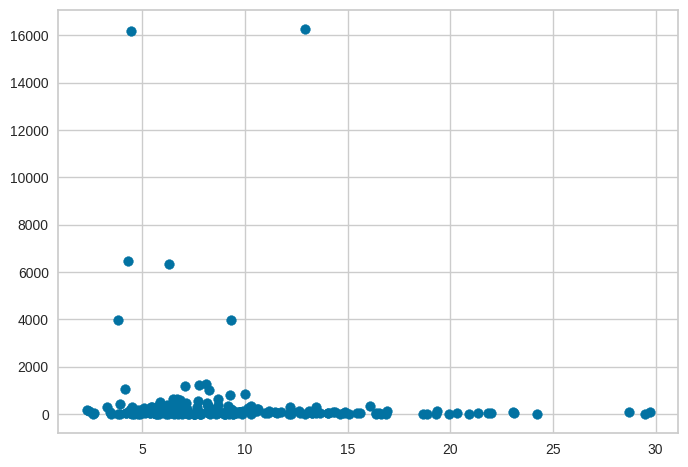

In [102]:
plt.scatter(dataset['Taxa_de_Óbito'], dataset['Densidade_Populacional']);

In [103]:
# Plotting fit

# Getting standard errors
prob_se = res.get_prediction().summary_frame()
prob_se['Taxa_de_Óbito'] = dataset['Taxa_de_Óbito']
prob_se.sort_values(by='Taxa_de_Óbito',inplace=True,ignore_index=True)

low = prob_se[prob_se['Taxa_de_Óbito'] <= 13.00].copy()
high = prob_se[prob_se['Taxa_de_Óbito'] > 13.00].copy()

Text(0.5, 1.0, 'RDD Reduced Cost Estimate 9 to 11')

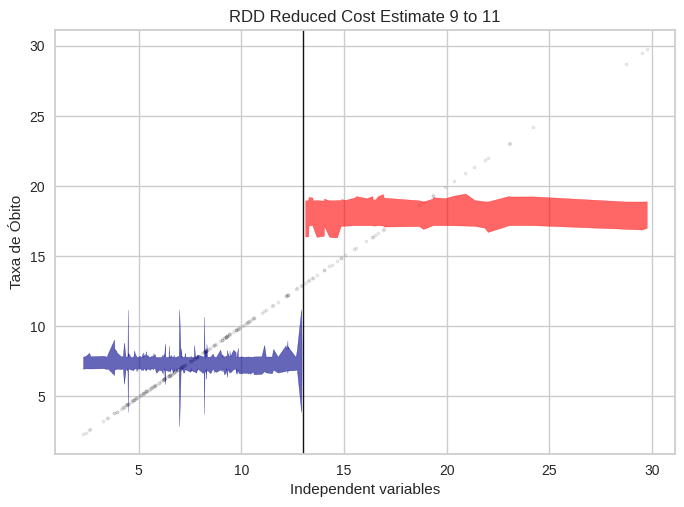

In [104]:
# Getting effect for threshold bump
coef = res.summary2().tables[1]
ci = coef.iloc[1,4:6].astype(int).to_list()

fig, ax = plt.subplots()

ax.scatter(dataset['Taxa_de_Óbito'], dataset['Taxa_de_Óbito'], c='grey',
           edgecolor='k', alpha=0.15, s=5, zorder=1)

ax.axvline(13.00, linestyle='solid', alpha=1.0, 
           color='k',linewidth=1, zorder=2)

ax.fill_between(low['Taxa_de_Óbito'],low['mean_ci_lower'],
                low['mean_ci_upper'],alpha=0.6,
                zorder=3, color='darkblue')

ax.fill_between(high['Taxa_de_Óbito'],high['mean_ci_lower'],
                high['mean_ci_upper'],alpha=0.6,
                zorder=3, color='red')

ax.set_xlabel('Independent variables')
ax.set_ylabel('Taxa de Óbito')
ax.set_title(f'RDD Reduced Cost Estimate {ci[0]} to {ci[1]}')

In [105]:
"""
Observamos portanto que a Taxa de Óbito não pode ser explicada pela população em si, sendo uma taxa altamente
impactada por outras variáveis e outras condições sociais que infligem no aumento ou na queda da taxa de óbito
"""

'\nObservamos portanto que a Taxa de Óbito não pode ser explicada pela população em si, sendo uma taxa altamente\nimpactada por outras variáveis e outras condições sociais que infligem no aumento ou na queda da taxa de óbito\n'